# 6.6 Sourcing & Analyzing Time-Series Data

### This script contains the following:

#### 1. Importing your libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing the data

### 1. Importing your libraries and data

Before you start this analysis, you'll need a new library you haven't installed before—Quandl. Install Quandl using conda:

`conda install quandl` - I installed quandl for the practice exercise, but do not need it for this task.

In [256]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [257]:
# Define path

path = r'C:\Users\polly\Documents\Achievement 6 Project'

In [221]:
# Import merged dataframe from last exercise

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'gdp_wbl_merged.csv'),index_col=False)

I will use the same data that I used for the last exercise, as it already included time series data (years). 

In [222]:
# Check size of dataframe

df.shape

(5859, 17)

In [223]:
# Check dataframe output

df.head()

,country_year,country,country_code,region,income_group,year,wbl_index,mobility,workplace,pay,marriage,parenthood,business,assets,pension,gdp_per_capita,_merge
0,AFG1991,Afghanistan,AFG,South Asia,Low income,1991,25.6,25,25,0,20,20,75,40,0,183.532775,both
1,AFG1992,Afghanistan,AFG,South Asia,Low income,1992,25.6,25,25,0,20,20,75,40,0,183.532775,both
2,AFG1993,Afghanistan,AFG,South Asia,Low income,1993,25.6,25,25,0,20,20,75,40,0,183.532775,both
3,AFG1994,Afghanistan,AFG,South Asia,Low income,1994,25.6,25,25,0,20,20,75,40,0,183.532775,both
4,AFG1995,Afghanistan,AFG,South Asia,Low income,1995,25.6,25,25,0,20,20,75,40,0,183.532775,both


In [224]:
# Create subset of dataframe with 'year' and 'wbl_index'

data_sub = df[['year', 'wbl_index']]

In [225]:
data_sub.shape

(5859, 2)

In [226]:
data_sub.head()

,year,wbl_index
0,1991,25.6
1,1992,25.6
2,1993,25.6
3,1994,25.6
4,1995,25.6


In [227]:
data_sub.columns

Index(['year', 'wbl_index'], dtype='object')

In [228]:
type(data_sub)

pandas.core.frame.DataFrame

In [258]:
# Set the year as the index of the dataframe.

data_sub = data_sub.set_index('year') 

In [260]:
data_sub.head()

,wbl_index
year,
1991,25.6
1992,25.6
1993,25.6
1994,25.6
1995,25.6


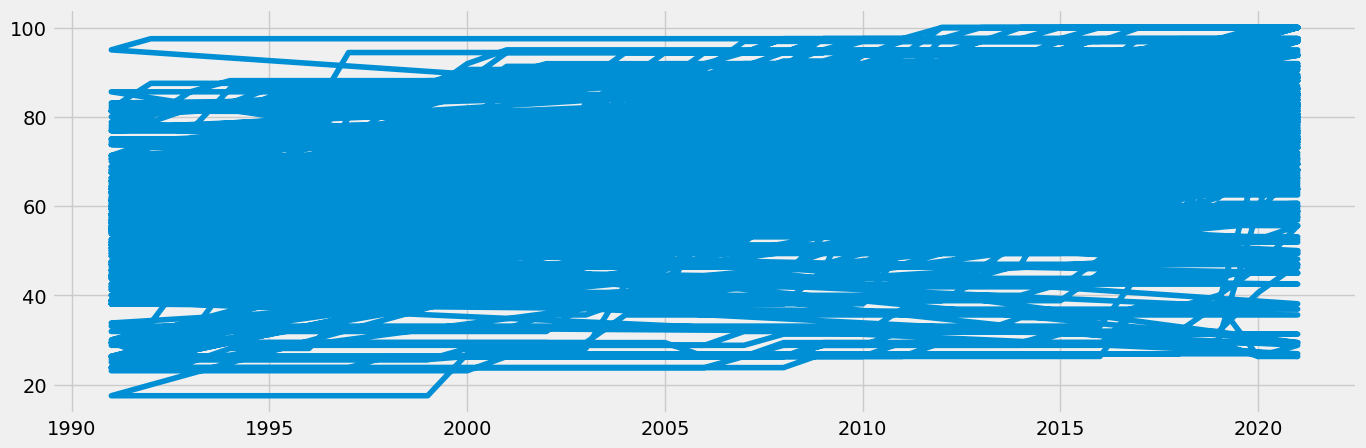

In [261]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data_sub)

I will group and aggregate the data in the next section to make the plot more meaningful - there are too many values per year (wbl_index for 189 countries) to be able to make sense of this plot.

### 2. Subsetting, wrangling, and cleaning time-series data

In [262]:
# Group data by year and aggregate by the mean of wbl_index

data_sub_agg = data_sub.groupby('year').agg({'wbl_index':['mean']})

In [263]:
data_sub_agg.head()

,wbl_index
,mean
year,
1991,54.701587
1992,55.098413
1993,55.628571
1994,56.196296
1995,56.911111


In [264]:
# Create a datetime column from 'year'

data_sub_agg.index = pd.to_datetime(data_sub_agg.index, format='%Y')

In [269]:
# Check output

data_sub_agg.head()

,wbl_index
,mean
year,
1991-01-01,54.701587
1992-01-01,55.098413
1993-01-01,55.628571
1994-01-01,56.196296
1995-01-01,56.911111


In [270]:
data_sub_agg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31 entries, 1991-01-01 to 2021-01-01
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (wbl_index, mean)  31 non-null     float64
dtypes: float64(1)
memory usage: 496.0 bytes


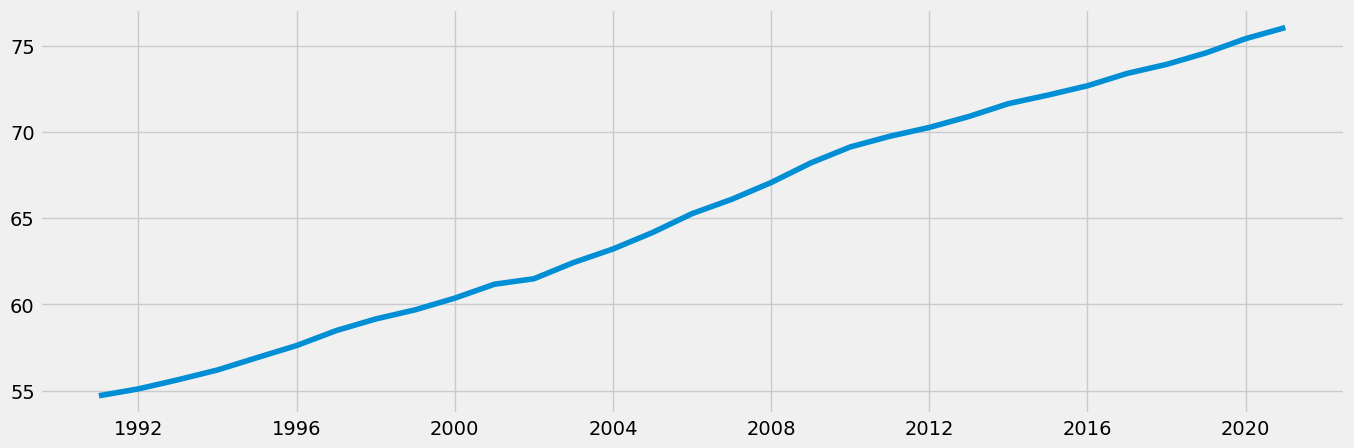

In [271]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub_agg)

In [272]:
# Check for missing values

data_sub_agg.isnull().sum() 

wbl_index  mean    0
dtype: int64

In [274]:
# Check for duplicates

dups = data_sub_agg.duplicated()
dups.sum()

0

### 3. Time-series analysis: decomposition

In [275]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub_agg, model='additive')

I used the 'additive' model, since the changes in the data behave in a linear fashion.

In [276]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

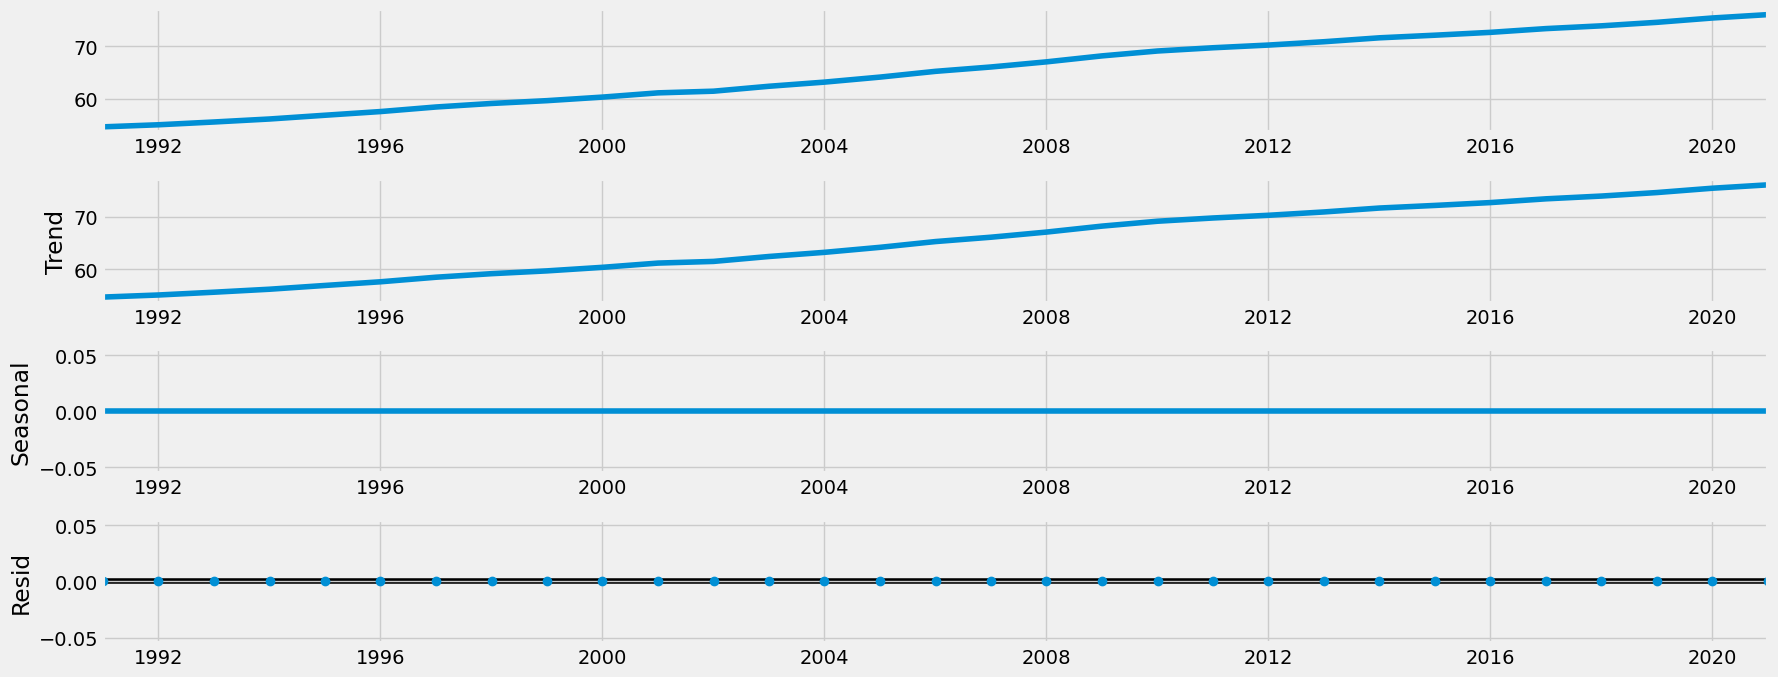

In [277]:
# Plot the separate components

decomposition.plot()
plt.show()

The first chart is the data itself (level). The 'level' and 'trend' appear the same because there is no noise in the data (does not need to be smoothed). The wbl_index (mean) gradually increases over time. There is no seasonality in the data, as the line is flat.

### 4. Testing for stationarity

In [246]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub_agg['wbl_index'])

Dickey-Fuller Stationarity test:
Test Statistic                  0.312433
p-value                         0.977908
Number of Lags Used             0.000000
Number of Observations Used    30.000000
Critical Value (1%)            -3.669920
Critical Value (5%)            -2.964071
Critical Value (10%)           -2.621171
dtype: float64


The null hypothesis would be the presence of a unit root, which is what we want to disprove. The alternative hypothesis is that there is no unit root. We are not able to reject the null hypothesis because the 'Test Statistic' / 0.32 is much higher than the 'Critical Value (5%) / -2.96'. Therefore, there is a unit root in the data and the data is non-stationary.

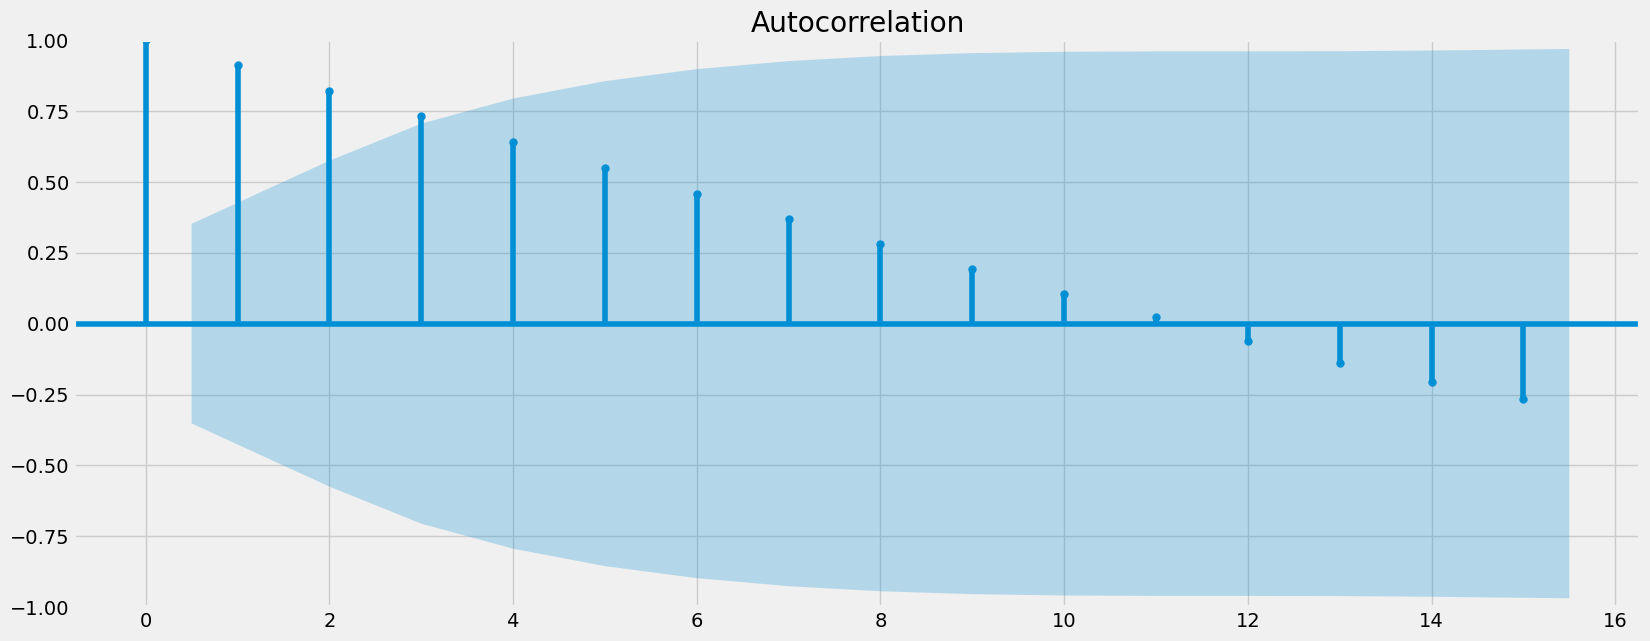

In [278]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_sub_agg)
plt.show()

### 5. Stationarizing the data

In [279]:
data_diff = data_sub_agg - data_sub_agg.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [280]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [281]:
data_diff.head()

,wbl_index
,mean
year,
1992-01-01,0.396825
1993-01-01,0.530159
1994-01-01,0.567725
1995-01-01,0.714815
1996-01-01,0.699471


In [282]:
data_diff.columns

MultiIndex([('wbl_index', 'mean')],
           )

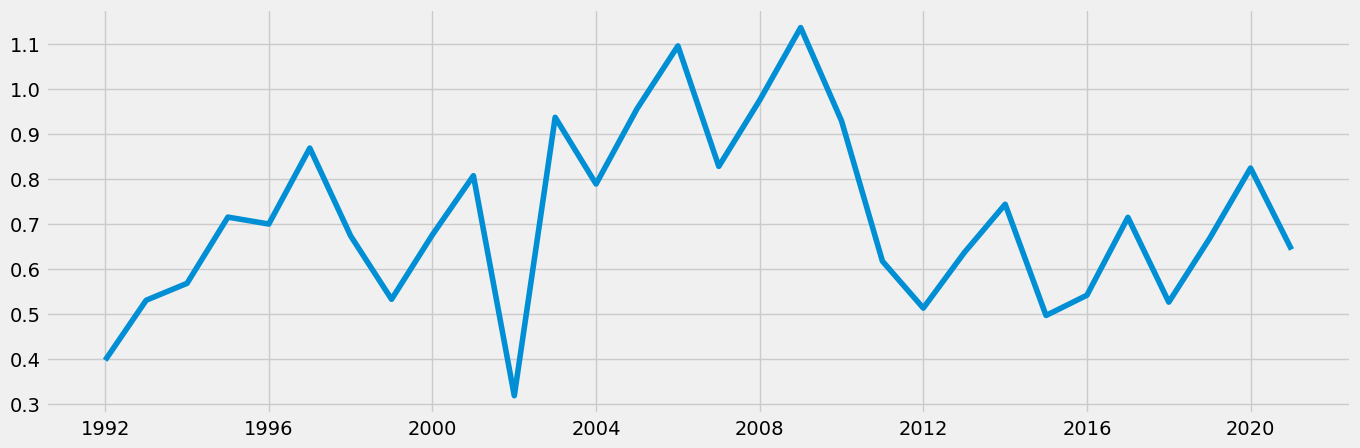

In [283]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [284]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -3.773810
p-value                         0.003187
Number of Lags Used             0.000000
Number of Observations Used    29.000000
Critical Value (1%)            -3.679060
Critical Value (5%)            -2.967882
Critical Value (10%)           -2.623158
dtype: float64


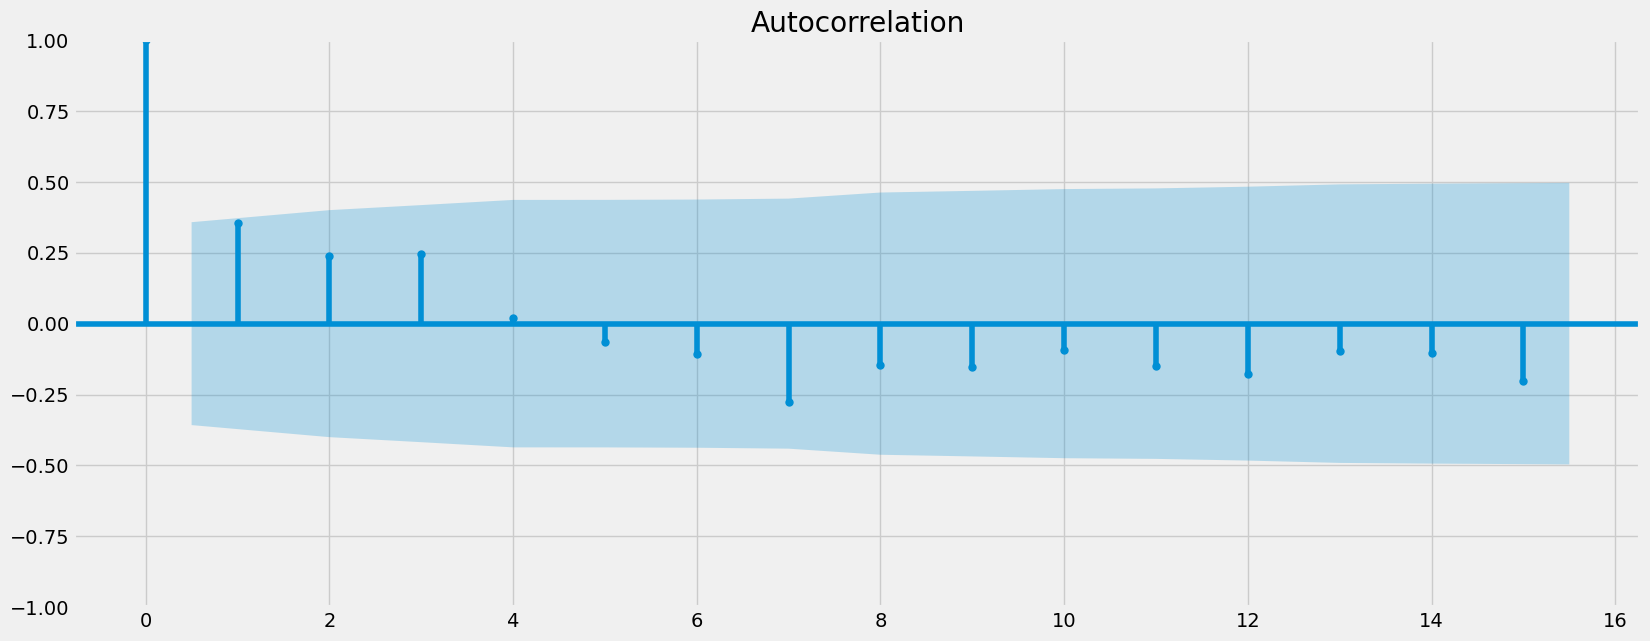

In [285]:
plot_acf(data_diff)
plt.show()

Both the Dickey-Fuller and the autocorrelation tests show that the data is now stationary. So, we don't need a second round of differencing.